In [2]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Forest Cover Type Dataset 
Tree types found in the Roosevelt National Forest in Colorado

https://www.kaggle.com/uciml/forest-cover-type-dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins
from scipy import stats

%matplotlib inline
plt.style.use('seaborn-white')

In [54]:
# Loading the data again.

df = pd.read_csv("/Users/mille/Desktop/Supervised Learning/Copy of covtype.csv")

df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Questions: 

How many variables do I have?
Total of 55 variables. 
    Selected variables:
    1) Elevation - meters (continuous)
    2) AspectAspect in degrees azimuth (interval 0-360)
    3) SlopeSlope in degrees (interval 0-90) [OUTCOME VARIABLE]
    4) Horizontal_Distance_To_HydrologyHorizontal distance to nearest surface water features (continuous)
    5) Horizontal_Distance_To_RoadwaysHorizontal distance to nearest roadway. (continuous) 
    6) Cover_TypeForest (categorical - ordinal: 1-7) 


How many datapoints?
11 MB csv file 
581k X 55 


Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
    1) Elevation - meters (continuous)
    2) Aspect - (continous: interval 0-360)
    3) Slope - (continous: interval 0-90) [OUTCOME VARIABLE]
    4) Horizontal_Distance_To_Hydrology - (continuous)
    5) Horizontal_Distance_To_Roadways - (continuous) 
    6) Cover_Type - (categorical - ordinal: 1-7) 

Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
    1) Elevation  - Normal distribution 
    2) Aspect - binomial 
    3) Slope - skewed left gamma
    4) Horizontal_Distance_To_Hydrology - gamma
    5) Horizontal_Distance_To_Roadways - gamma
    6) Cover_TypeForest - poisson 

Do I have missing data? If so, how much?
None

How much variance is there in each of my variables? 
    1) Elevation - 78391.31649113903 HIGH VARIANCE
    2) Aspect - 12524.659392137874 HIGH VARIANCE
    3) Slope - 56.07366896224123 LOW VARIANCE
    4) Horizontal_Distance_To_Hydrology - 45177.15080780635 HIGH VARIANCE
    5) Horizontal_Distance_To_Roadways - 2431271.564746081 HIGH VARIANCE
    6) Cover_Type - 1.9502209482198223 LOW VARIANCE 
 

Cover_Type
1.Spruce/Fir
2.Lodgepole Pine
3.Ponderosa Pine
4.Cottonwood/Willow
5.Aspen
6.Douglas-fir
7.Krummholz

In [6]:
df.index
df.columns

pd.DataFrame(df)
#complete dataset 365 rows x 11 columns 

df.shape

(581012, 55)

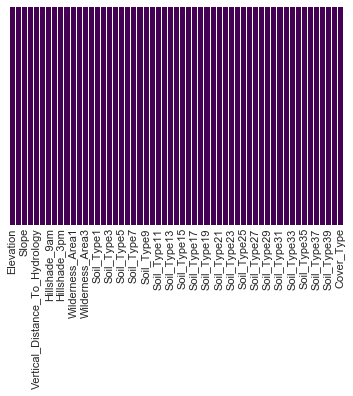

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing data in the entire data frame. 

In [8]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

Univariate variables - histograms 

C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'Continuous variable of Elevation, close to a normal distribution'

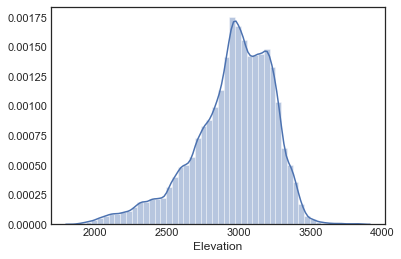

In [10]:
import seaborn as sns, numpy as np
sns.distplot(df['Elevation'])

"""Continuous variable of Elevation, close to a normal distribution"""

In [11]:
print(np.var(df.Elevation))

78391.31649113903


'Continuous variable of Aspect, binomial'

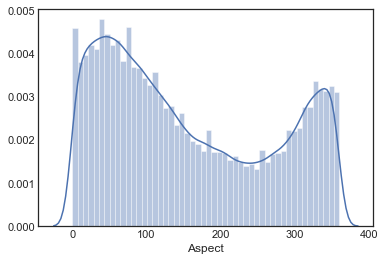

In [12]:
sns.distplot(df['Aspect'])

"""Continuous variable of Aspect, binomial"""

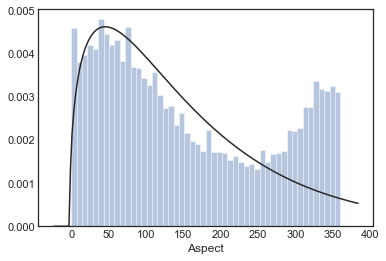

In [13]:
sns.distplot(df['Aspect'], kde=False, fit=stats.gamma)

In [14]:
print(np.var(df.Aspect))

12524.659392137874


'Continuous variable of Slope, gamma distribution'

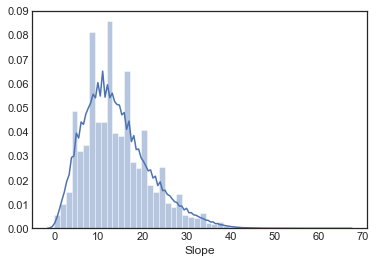

In [15]:
sns.distplot(df['Slope'])

"""Continuous variable of Slope, gamma distribution"""

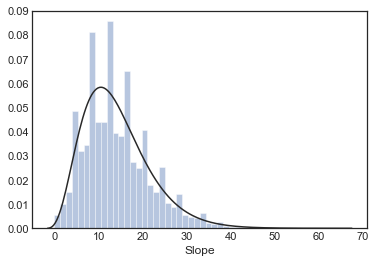

In [16]:
sns.distplot(df['Slope'], kde=False, fit=stats.gamma)


In [17]:
print(np.var(df.Slope))

56.07366896224123


'Continuous variable of Horizontal_Distance_To_Hydrology, gamma distribution'

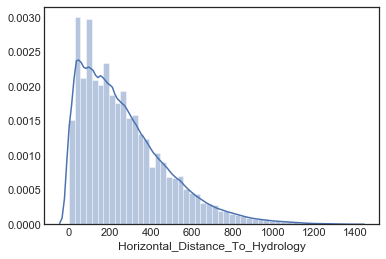

In [18]:

sns.distplot(df['Horizontal_Distance_To_Hydrology'])

"""Continuous variable of Horizontal_Distance_To_Hydrology, gamma distribution"""

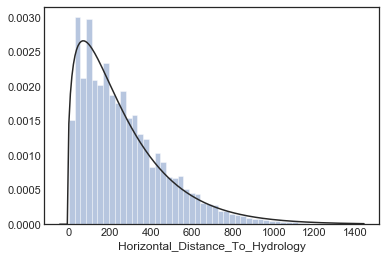

In [19]:
sns.distplot(df['Horizontal_Distance_To_Hydrology'], kde=False, fit=stats.gamma)

In [20]:
print(np.var(df.Horizontal_Distance_To_Hydrology))

45177.15080780635


'Continuous variable of Horizontal_Distance_To_Roadways, gamma distribution'

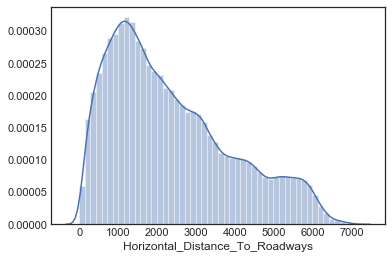

In [21]:

sns.distplot(df['Horizontal_Distance_To_Roadways'])

"""Continuous variable of Horizontal_Distance_To_Roadways, gamma distribution"""

In [22]:
print(np.var(df.Horizontal_Distance_To_Roadways))

2431271.564746081


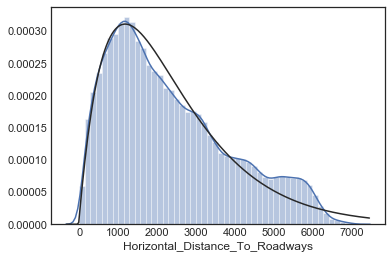

In [23]:
sns.distplot(df['Horizontal_Distance_To_Roadways'], kde=True, fit=stats.gamma)


'Continuous variable of Cover_Type, gamma distribution'

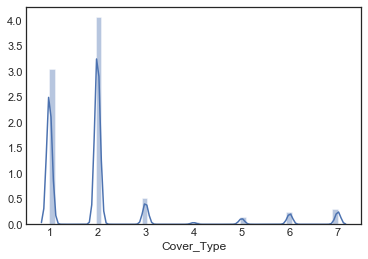

In [24]:

sns.distplot(df['Cover_Type'])

"""Continuous variable of Cover_Type, gamma distribution"""

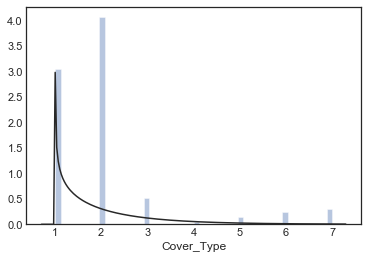

In [25]:
sns.distplot(df['Cover_Type'], kde=False, fit=stats.gamma)

In [26]:
print(np.var(df.Cover_Type))

1.9502209482198223


Bivariate plots

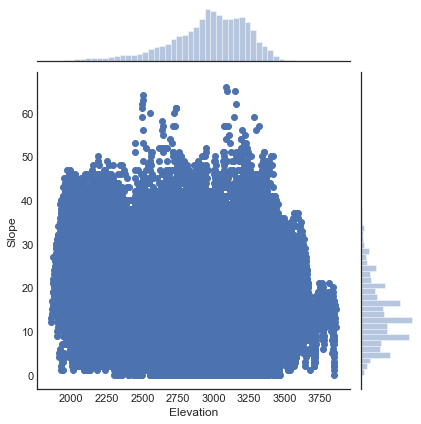

In [27]:
sns.jointplot(x="Elevation", y="Slope", data=df);


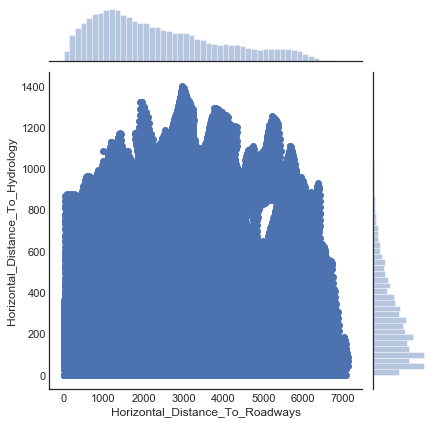

In [28]:
sns.jointplot(x="Horizontal_Distance_To_Roadways", y="Horizontal_Distance_To_Hydrology", data=df);


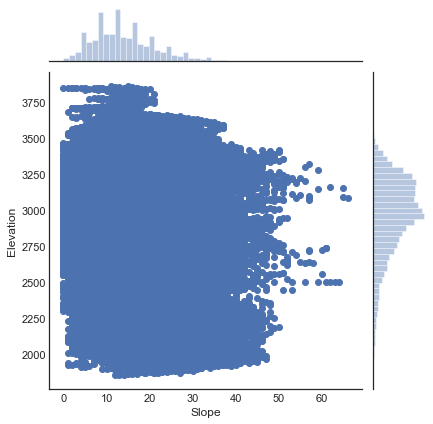

In [29]:
sns.jointplot(x="Slope", y="Elevation", data=df);


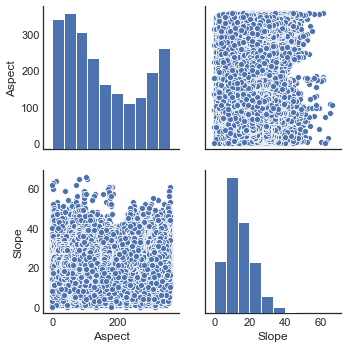

In [30]:
sns.pairplot(df, vars=["Aspect", "Slope"])

In [31]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [32]:
df.set_index("Cover_Type", inplace=True)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
5,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
5,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


'Seaborn Regplot Linear Regression of Slope by Aspect. \nThere are so many data points - no real re'

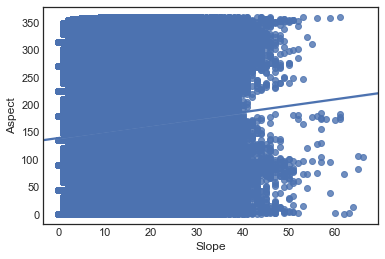

In [33]:
sns.regplot(x="Slope", y="Aspect", data=df)

"""Seaborn Regplot Linear Regression of Slope by Aspect. 
There are so many data points - no real re"""

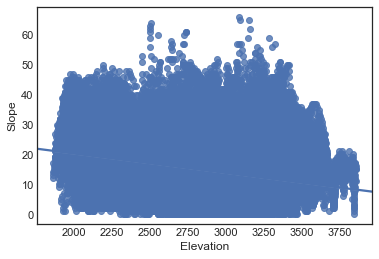

In [34]:
sns.regplot(x="Elevation", y="Slope", data=df)


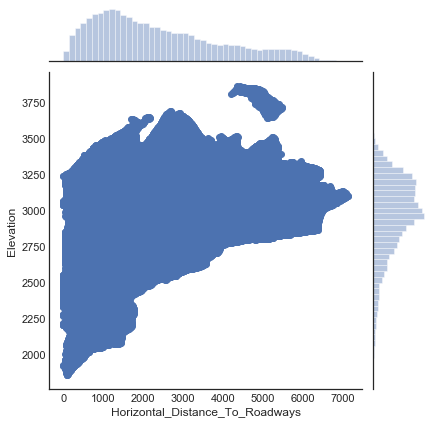

In [36]:
sns.jointplot(x="Horizontal_Distance_To_Roadways", y="Elevation", data=df)


For a continuous and a categorical pair:
Box, violin, or similar plots estimate the value of the continuous variable for each value of the categorical variable.
Descriptive statistics, including estimates of central tendency and variance, for the continuous variable at each level of the categorical variable.
T-tests and ANOVA
Look for: Outliers in each group, very small groups

In [55]:
df.select_dtypes(include=['object']).copy()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [56]:
replacements = {'Cover_Type': { 1: 'Spruce and Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine', 4: 'Cottonwood and Willow',
                                  5: 'Aspen', 6: 'Douglas-fir', 7: 'Krummholz'}}
#df['Cover_Type'].replace(replacements, inplace=True)

In [57]:
df['Cover_Type']

0         5
1         5
2         2
3         2
4         5
5         2
6         5
7         5
8         5
9         5
10        5
11        2
12        2
13        5
14        5
15        5
16        5
17        5
18        5
19        5
20        5
21        2
22        5
23        5
24        5
25        5
26        5
27        2
28        2
29        5
         ..
580982    3
580983    3
580984    3
580985    3
580986    3
580987    3
580988    3
580989    3
580990    3
580991    3
580992    3
580993    3
580994    3
580995    3
580996    3
580997    3
580998    3
580999    3
581000    3
581001    3
581002    3
581003    3
581004    3
581005    3
581006    3
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int64

In [59]:
df['Cover_Type'] = df['Cover_Type'].apply({ 1: 'Spruce and Fir',
  2: 'Lodgepole Pine',
  3: 'Ponderosa Pine',
  4: 'Cottonwood and Willow',
  5: 'Aspen',
  6: 'Douglas-fir',
  7: 'Krummholz'}.get)



In [60]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,Aspen


In [61]:
df_czch = df.loc[
    ((df['Cover_Type'] == 'Spruce and Fir') | (df['Cover_Type'] == 'Douglas-fir')) & (df['Elevation'] == 2500),
    ['Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Elevation', 'Aspect', 'Slope']
]



Multivariate pairgrid comparison 

C:\Users\mille\Conda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\mille\Conda3\lib\site-packages\matplotlib\contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\mille\Conda3\lib\site-packages\matplotlib\contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\mille\Conda3\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\Users\mille\Conda3\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\Users\mille\Conda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found 

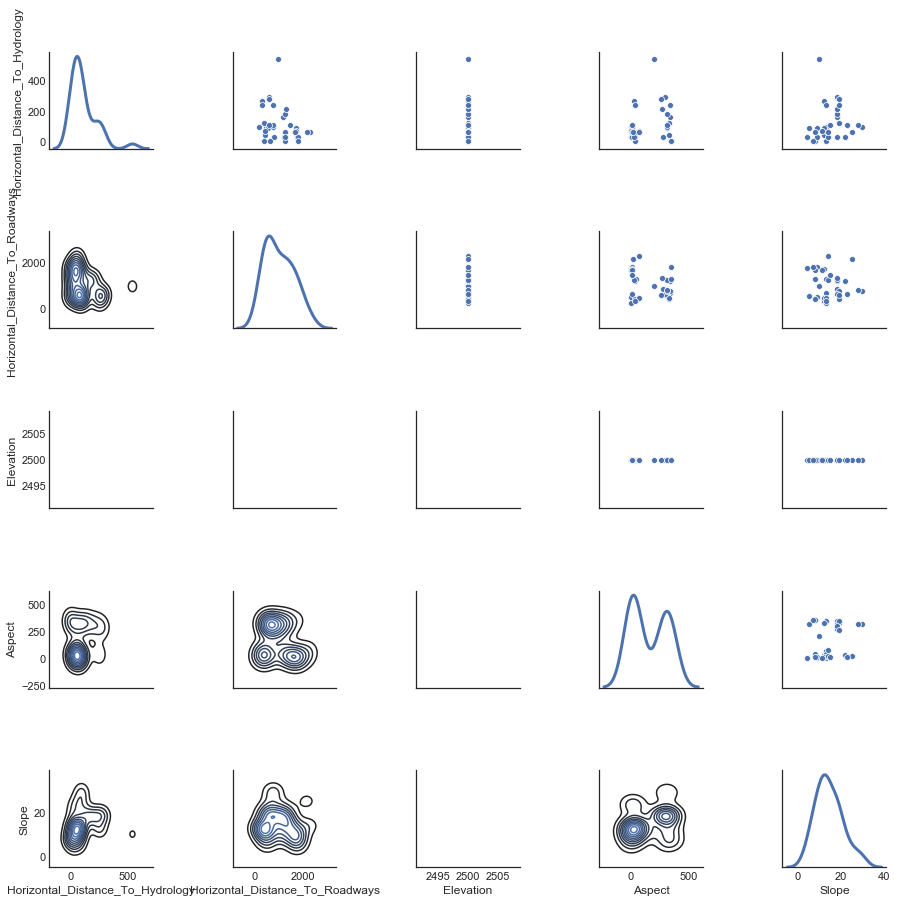

In [62]:
g = sns.PairGrid(df_czch, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

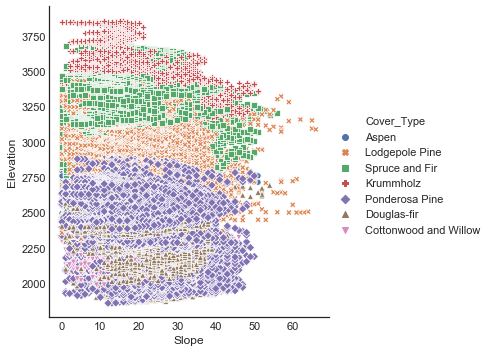

In [63]:
sns.relplot(x="Slope", y="Elevation", hue="Cover_Type", style="Cover_Type",
            data=df)

Multivariate Seaborn relplot. The different colors represent different Cover Types in the forest. 

In [64]:
krum = df.groupby('Cover_Type').get_group('Krummholz')

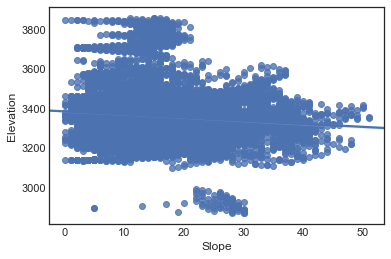

In [65]:
sns.regplot(x="Slope", y="Elevation", data=krum)


Seaborn regplot after preforming a groupby of Cover_Type of Krummholz. The plot shows the majority of cover type is 
above 3000 meters. 

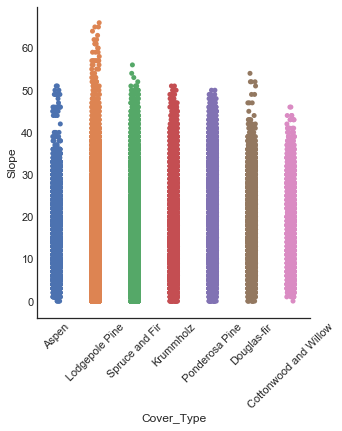

In [66]:

g = sns.catplot(x="Cover_Type", y="Slope", data=df)
g.set_xticklabels(rotation=45)


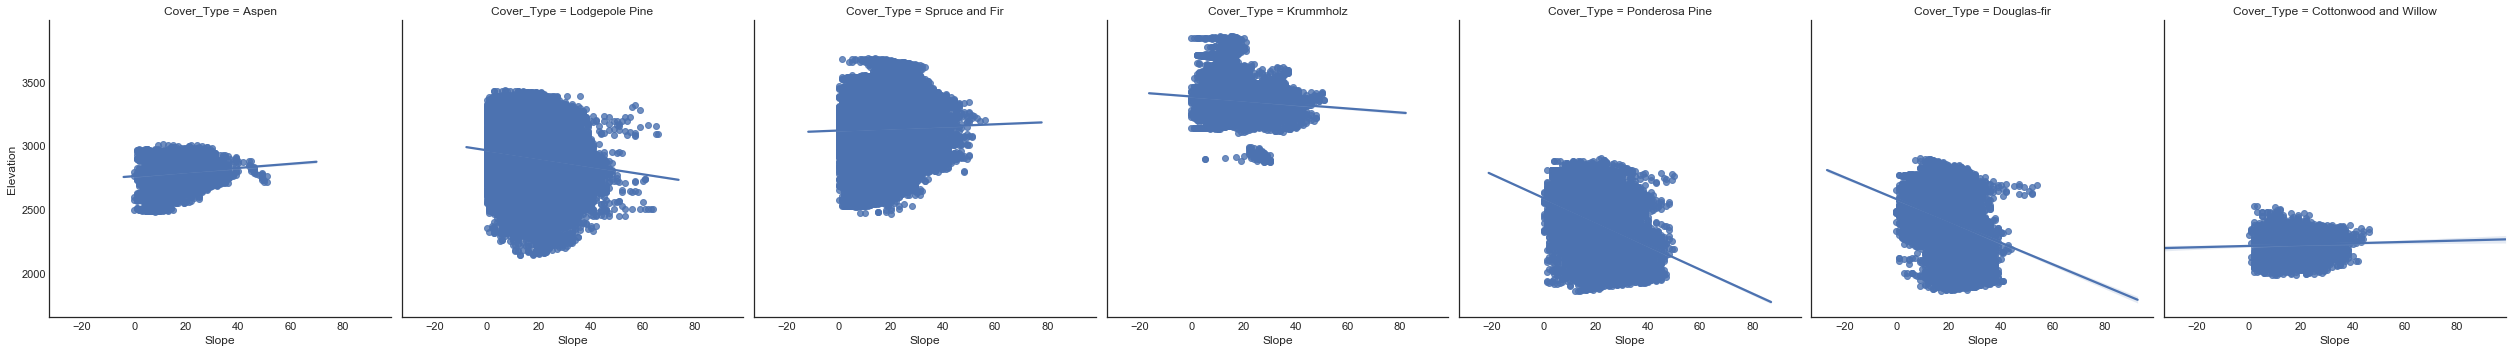

In [67]:
sns.lmplot(x='Slope', y='Elevation', data=df, col='Cover_Type')


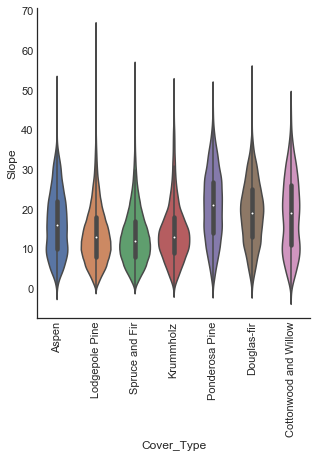

In [68]:
g = sns.catplot(x="Cover_Type", y="Slope",
            kind="violin", split=True, data=df)
g.set_xticklabels(rotation=90)

[Text(0,0,'Aspen'),
 Text(0,0,'Lodgepole Pine'),
 Text(0,0,'Spruce and Fir'),
 Text(0,0,'Krummholz'),
 Text(0,0,'Ponderosa Pine'),
 Text(0,0,'Douglas-fir'),
 Text(0,0,'Cottonwood and Willow')]

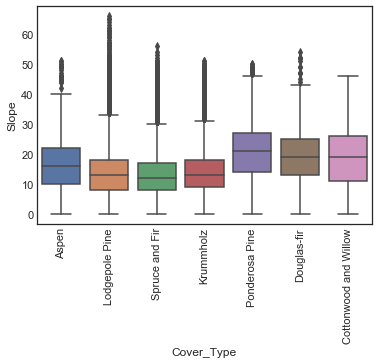

In [69]:
g = sns.boxplot(x="Cover_Type", y="Slope", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0,0,'Aspen'),
 Text(0,0,'Lodgepole Pine'),
 Text(0,0,'Spruce and Fir'),
 Text(0,0,'Krummholz'),
 Text(0,0,'Ponderosa Pine'),
 Text(0,0,'Douglas-fir'),
 Text(0,0,'Cottonwood and Willow')]

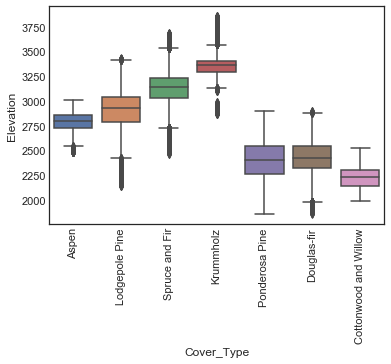

In [70]:
g = sns.boxplot(x="Cover_Type", y="Elevation", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0,0,'Aspen'),
 Text(0,0,'Lodgepole Pine'),
 Text(0,0,'Spruce and Fir'),
 Text(0,0,'Krummholz'),
 Text(0,0,'Ponderosa Pine'),
 Text(0,0,'Douglas-fir'),
 Text(0,0,'Cottonwood and Willow')]

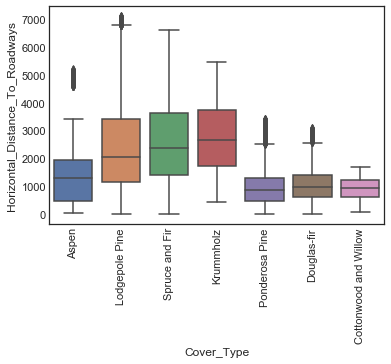

In [71]:
g = sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Roadways", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0,0,'Aspen'),
 Text(0,0,'Lodgepole Pine'),
 Text(0,0,'Spruce and Fir'),
 Text(0,0,'Krummholz'),
 Text(0,0,'Ponderosa Pine'),
 Text(0,0,'Douglas-fir'),
 Text(0,0,'Cottonwood and Willow')]

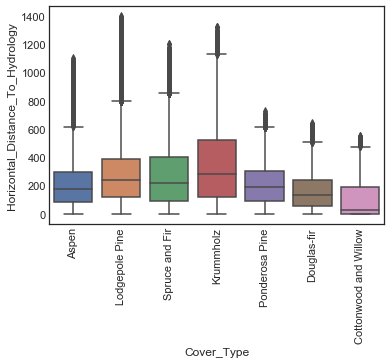

In [72]:
g = sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Hydrology", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


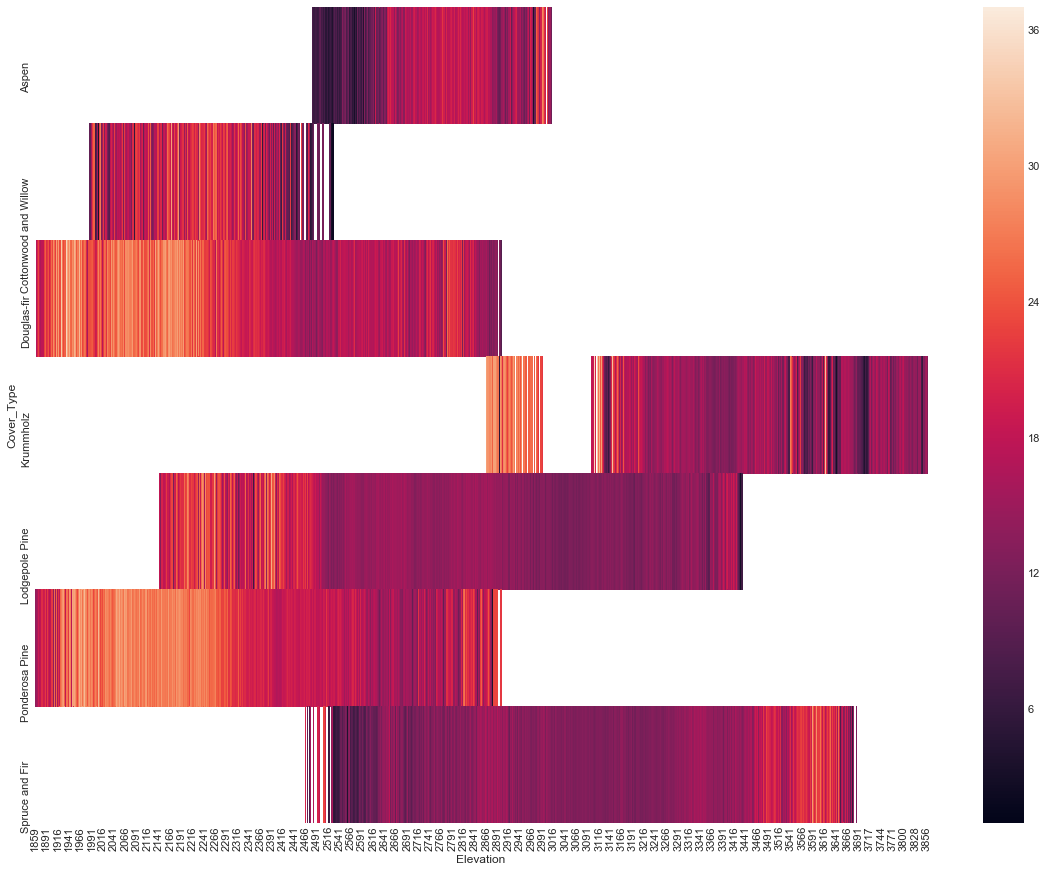

In [73]:
plt.subplots(figsize=(20,15))

trees = df.pivot_table(values='Slope',index='Cover_Type',columns='Elevation')
sns.heatmap(trees)

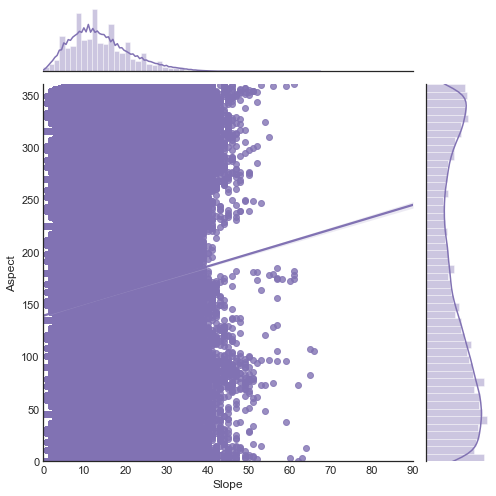

In [74]:
g = sns.jointplot("Slope", "Aspect", data=df, kind="reg",
                  xlim=(0, 90), ylim=(0, 360), color="m", height=7)

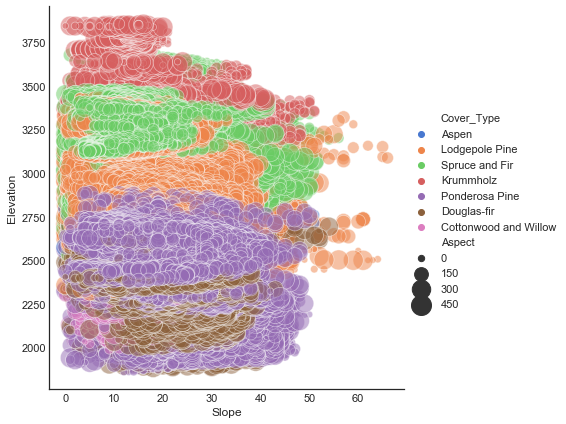

In [75]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Slope", y="Elevation", hue="Cover_Type", size="Aspect",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

C:\Users\mille\Conda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mille\Conda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


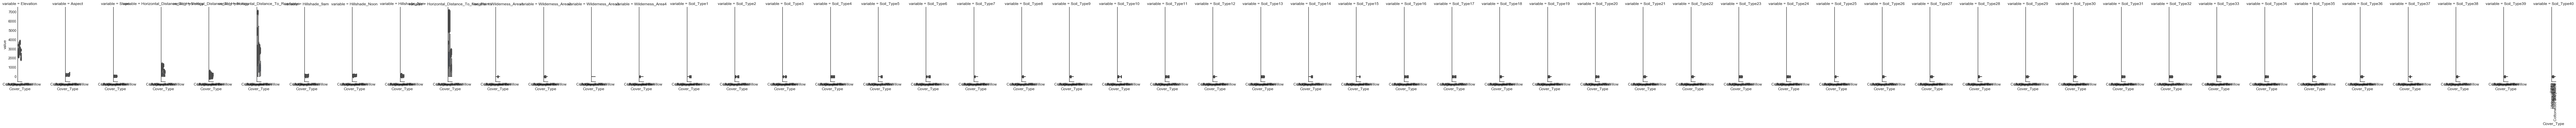

                         Aspect                                            \
                          count        mean         std  min   25%    50%   
Cover_Type                                                                  
Aspen                    9493.0  139.283051   91.568676  0.0  71.0  111.0   
Cottonwood and Willow    2747.0  137.139425   86.996931  0.0  83.5  119.0   
Douglas-fir             17367.0  180.539068  133.786561  0.0  43.0  173.0   
Krummholz               20510.0  153.236226  110.648845  0.0  66.0  123.0   
Lodgepole Pine         283301.0  152.060515  107.658352  0.0  60.0  127.0   
Ponderosa Pine          35754.0  176.372490  107.582644  0.0  90.0  160.0   
Spruce and Fir         211840.0  156.138227  116.677893  0.0  52.0  122.0   

                                    Elevation              ...   \
                         75%    max     count         mean ...    
Cover_Type                                                 ...    
Aspen                  191.0

In [76]:
df_long = df
df_long = pd.melt(df_long, id_vars=['Cover_Type'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "Cover_Type", "value")
g = plt.xticks(rotation=90)

plt.show()

# Descriptive statistics by group.
print(df.groupby('Cover_Type').describe())

# Test whether group differences are significant.
for col in df.loc[:,'Aspect':'Slope'].columns:
    print(col)
    print(stats.ttest_ind(
        df[df['Cover_Type'] == 'Ponderosa Pine'][col].dropna(),
        df[df['Cover_Type'] == 'Krummholz'][col].dropna()
    ))


Defining the degrees of slope https://geographyfieldwork.com/SlopeSteepnessIndex.htm

Exploring ANOVA and T-Test of Cover_Type and Slope of Aspen and Cottonwood/Willow

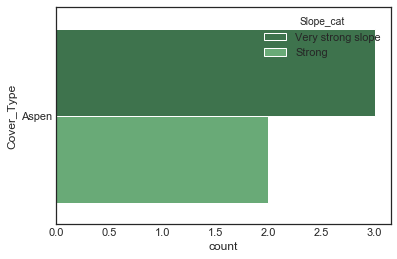

Slope_cat   Strong  Very strong slope
Cover_Type                           
Aspen            2                  3
Power_divergenceResult(statistic=0.2, pvalue=0.6547208460185768)


In [77]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['Cover_Type'] == 'Aspen') | (df['Cover_Type'] == 'Cottonwood and Willow')) & (df['Elevation'] == 2700),
    ['Cover_Type','Slope']
]

# Create a text variable so that output is easier to interpret.
df_2cat['Slope_cat'] = None
df_2cat.loc[df_2cat['Slope'] == 0, 'Slope_cat'] = 'Level'
df_2cat.loc[df_2cat['Slope'] == 0.3, 'Slope_cat'] = 'Nearly Level'
df_2cat.loc[df_2cat['Slope'] <= 3, 'Slope_cat'] = 'Very gentle slope'
df_2cat.loc[df_2cat['Slope'] == 5, 'Slope_cat'] = 'Moderate slope'
df_2cat.loc[df_2cat['Slope'] <= 8.5, 'Slope_cat'] = 'Strong'
df_2cat.loc[df_2cat['Slope'] == 16.5, 'Slope_cat'] = 'Strong'
df_2cat.loc[df_2cat['Slope'] >= 24, 'Slope_cat'] = 'Very strong slope'



# Plot counts for each combination of levels.
sns.countplot(y="Cover_Type", hue="Slope_cat", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['Cover_Type'], df_2cat['Slope_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

T-statistic is 0.2 and pvalue of 0.654 that this analysis is not a significant finding. 

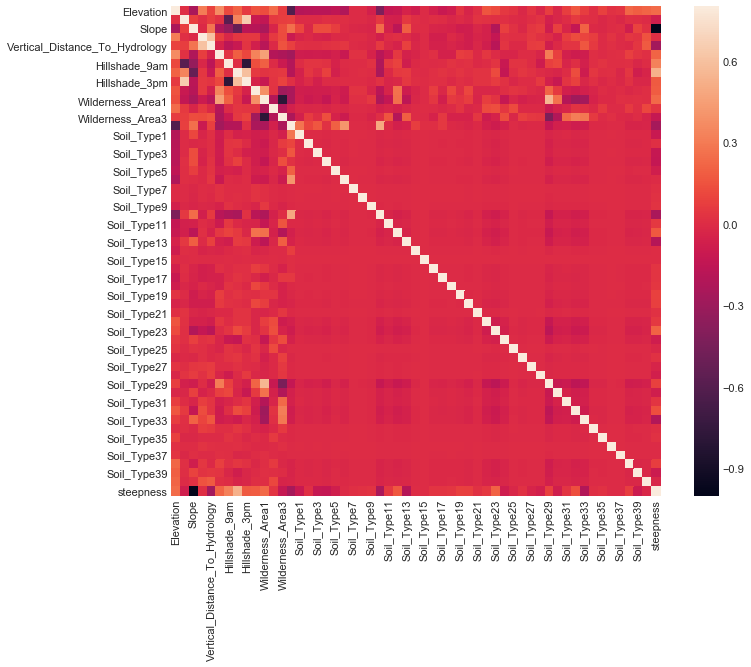

            Elevation     Slope    Aspect  tree_stuff
Elevation    1.000000 -0.242697  0.015735    0.470149
Slope       -0.242697  1.000000  0.078728    0.508460
Aspect       0.015735  0.078728  1.000000    0.665634
tree_stuff   0.470149  0.508460  0.665634    1.000000


In [92]:

corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Looks like 'pplfair','ppltrst' and 'pplhlp' are pretty redundant with each
# other. Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = df[['Elevation','Slope','Aspect']].mean(axis=0)
stds = df[['Elevation','Slope','Aspect']].std(axis=0)
df['tree_stuff'] = ((df[['Elevation','Slope','Aspect']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['Elevation','Slope','Aspect']]
plotdf['tree_stuff'] = df['tree_stuff'] 
corrmat2 = plotdf.corr()

print(corrmat2)

Histogram distrubtions in: Raw, Log, Square root, and Inverse

<Figure size 432x288 with 0 Axes>

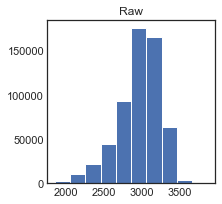

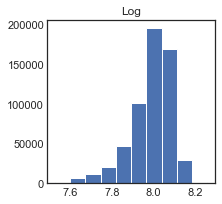

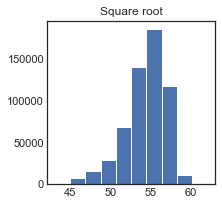

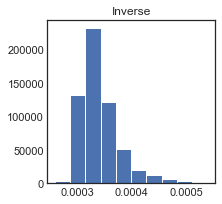

In [79]:
# Making a four-panel plot.
fig = plt.figure()

plt.subplots(figsize=(3,3))
plt.hist(df['Elevation'].dropna())
plt.title('Raw')

plt.subplots(figsize=(3,3))
plt.hist(np.log(df['Elevation'].dropna()))
plt.title('Log')

plt.subplots(figsize=(3,3))
plt.hist(np.sqrt(df['Elevation'].dropna()))
plt.title('Square root')

plt.subplots(figsize=(3,3))
plt.hist(1/df['Elevation'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.



Seaborn regplot showing a inverse quadradric relationship. 

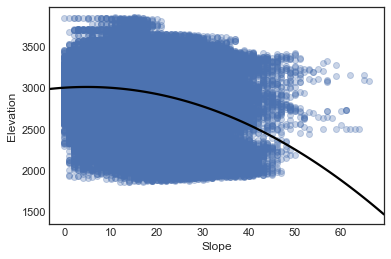

In [93]:
sns.regplot(
    df['Slope'],
    y=df['Elevation'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

#df['Slope'] * df['Slope']

In [81]:
df['steepness'] = max(df['Slope']) - df['Slope']

Assigning a new variable Steepness of max(df['Slope']) - df['Slope']

This gives us a linear relationship. 

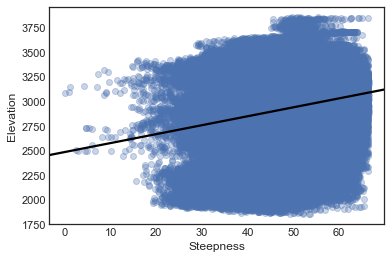

In [82]:

sns.regplot(
    df['steepness'],
    df['Elevation'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Steepness')
plt.ylabel('Elevation')
plt.show()

Sklearn - matching the standard deviations 

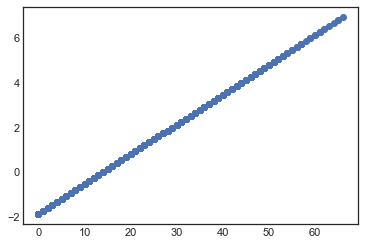

          Elevation        Aspect         Slope  \
count  5.810120e+05  5.810120e+05  5.810120e+05   
mean  -9.488647e-15  5.911763e-15 -9.378760e-14   
std    1.000001e+00  1.000001e+00  1.000001e+00   
min   -3.930094e+00 -1.390866e+00 -1.883448e+00   
25%   -5.370487e-01 -8.726087e-01 -6.815629e-01   
50%    1.308455e-01 -2.560618e-01 -1.473917e-01   
75%    7.273071e-01  9.323547e-01  5.203224e-01   
max    3.209587e+00  1.825901e+00  6.930377e+00   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      5.810120e+05                    5.810120e+05   
mean                       4.811222e-14                   -9.637271e-14   
std                        1.000001e+00                    1.000001e+00   
min                       -1.267604e+00                   -3.763928e+00   
25%                       -7.594865e-01                   -6.761941e-01   
50%                       -2.419591e-01                   -2.816503e-01   
75%            

In [83]:
# If this is the first time you're using scikit-learn you'll first want to do
# pip install sklearn from your terminal to install the package.
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['Slope'], df_scaled['Slope'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

PCA Analysis of the dataframe using the following variables: ['Elevation','Aspect','Slope','Hillshade_3pm']

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

Starting the PCA Analysis - comparing the raw and standardized figures of the data analysis. 

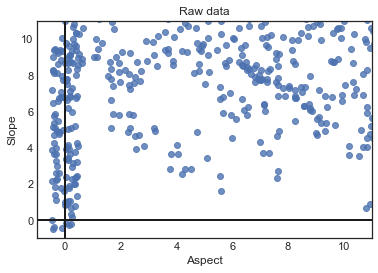

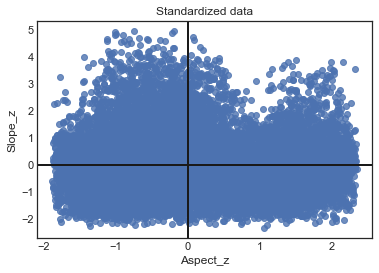

In [85]:



# Take a subset of the data for PCA. This limits to Swiss and Czech data from 2012
# and keeps only specific columns.
df_pca = df.loc[
    ((df['Cover_Type'] == 'Krummholz') | (df['Cover_Type'] == 'Aspen')) & (df['Elevation'] >= 2900),
    ['Elevation','Aspect','Slope','Hillshade_3pm']
].dropna()

t = sns.regplot(
    'Aspect',
    'Slope',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()


# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
df_pca['Aspect_z'] = (df_pca['Aspect'] - df_pca['Aspect'].mean()) / df_pca['Aspect'].std()
df_pca['Slope_z'] = (df_pca['Slope'] - df_pca['Slope'].mean()) / df_pca['Slope'].std()

t = sns.regplot(
    'Aspect_z',
    'Slope_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

PCA Rotated standardized figure of the plot. It is rotated cos(40) and sin(40)

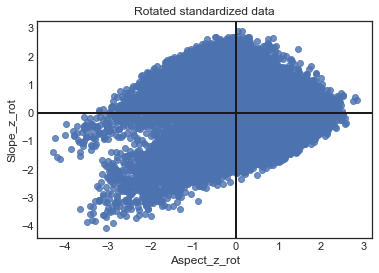

In [86]:
# Rotating the data so that the axes roughly match to vector above.
df_pca['Aspect_z_rot'] = math.cos(40) * df_pca['Aspect_z'] - math.sin(40) * df_pca['Slope_z']
df_pca['Slope_z_rot'] = math.sin(40) * df_pca['Aspect_z'] + math.cos(40) * df_pca['Slope_z']

t = sns.regplot(
    'Aspect_z_rot',
    'Slope_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

Covariance Matrix: most significant value 0.58029864

In [87]:
# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them. We could also impute, but missingness is quite low so dropping
# missing rows is unlikely to create bias.
df_pca = df.loc[
    ((df['Cover_Type'] == 'Krummholz') | (df['Cover_Type'] == 'Aspen')) & (df['Elevation'] >= 2900),
    ['Elevation','Aspect','Slope','Hillshade_3pm']
].dropna()

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00004643  0.06592959 -0.08450778  0.1026449 ]
 [ 0.06592959  1.00004643 -0.04459712  0.58029864]
 [-0.08450778 -0.04459712  1.00004643 -0.53868756]
 [ 0.1026449   0.58029864 -0.53868756  1.00004643]]


In [88]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 4).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.17292521]
 [ 0.51347707]
 [-0.4848202 ]
 [ 0.68657669]]
Eigenvalue 1: 1.8402825642530445
----------------------------------------
Eigenvector 2: 
[[ 0.8506441 ]
 [-0.42152042]
 [-0.29524806]
 [-0.1074883 ]]
Eigenvalue 2: 0.9837375669674822
----------------------------------------
Eigenvector 3: 
[[-0.49648913]
 [-0.54351743]
 [-0.67456718]
 [ 0.05519476]]
Eigenvalue 3: 0.9459913483601208
----------------------------------------
Eigenvector 4: 
[[ 1.55474185e-04]
 [-5.13079559e-01]
 [ 4.71950300e-01]
 [ 7.16946481e-01]]
Eigenvalue 4: 0.23017422144070898
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.46004928 0.24592297 0.23648686 0.05754088]


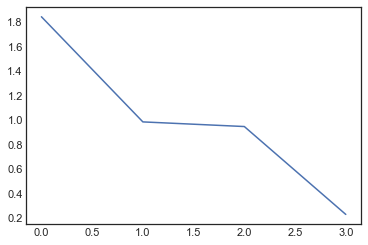

In [89]:
plt.plot(eig_val_cov)
plt.show()

Transforming the data frame - df_pca[['Elevation','Aspect','Slope','Hillshade_3pm']]

There is a significant difference between Elevation variable and the rest of the tested variables. 

C:\Users\mille\Conda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


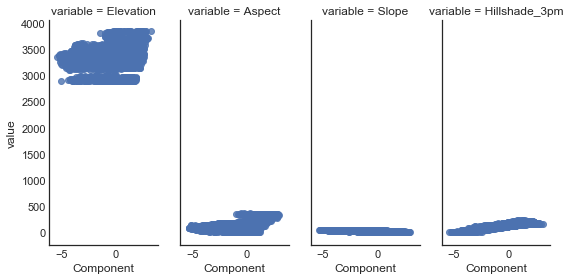

In [90]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[['Elevation','Aspect','Slope','Hillshade_3pm']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.46004928 0.24592297 0.23648686 0.05754088]


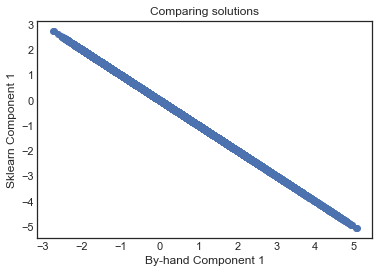

In [91]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()